In [11]:
import os
import numpy as np


In [12]:
def read_confusion_matrix(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        matrix = []
        for line in lines:
            row = [int(x) for x in line.strip('[] \n').split()]
            matrix.append(row)
        return np.array(matrix)

In [13]:
def calculate_metrics(confusion_matrix):
    [[tn, fp], [fn, tp]] = confusion_matrix
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy, precision, recall, f1_score

In [14]:
dataset_name = "UCEC"
data_types = [
    "mrna",
    "mirna",
    "methy",
    "methy_mirna",
    "mirna_mrna",
    "methy_mrna",
    "methy_mirna_mrna",
]
data_roots = ["methy", "mrna", "mirna"]

file_name = "confusion_matrix.txt"

results = {}
# Create evaluation_matrix folder
eval_folder = "evaluation_matrix"
if not os.path.exists(eval_folder):
    os.makedirs(eval_folder)

results_file_name = os.path.join(eval_folder, f"evaluation_results_{dataset_name}.txt")

results = {}

In [15]:
#Open the results file
with open(results_file_name, 'w') as results_file:
    results_file.write(f"Evaluation Results for {dataset_name}\n\n")

    for data_type in data_types:
        dir_name = f"logs/logs_{dataset_name}_{data_type}/plots"
        filepath = os.path.join(dir_name, file_name)
        
        if os.path.exists(filepath):
            print(f"\nProcessing: {data_type}")
            results_file.write(f"\nProcessing: {data_type}\n")
            try:
                conf_matrix = read_confusion_matrix(filepath)
                accuracy, precision, recall, f1_score = calculate_metrics(conf_matrix)
                
                results[data_type] = {
                    "confusion_matrix": conf_matrix,
                    "accuracy": accuracy,
                    "precision": precision,
                    "recall": recall,
                    "f1_score": f1_score
                }
                
                print(f"Confusion Matrix:\n{conf_matrix}")
                print(f"Accuracy: {accuracy:.4f}")
                print(f"Precision: {precision:.4f}")
                print(f"Recall: {recall:.4f}")
                print(f"F1 Score: {f1_score:.4f}")
                
                results_file.write(f"Confusion Matrix:\n{conf_matrix}\n")
                results_file.write(f"Accuracy: {accuracy:.4f}\n")
                results_file.write(f"Precision: {precision:.4f}\n")
                results_file.write(f"Recall: {recall:.4f}\n")
                results_file.write(f"F1 Score: {f1_score:.4f}\n")
            except Exception as e:
                error_message = f"Error processing {data_type}: {str(e)}"
                print(error_message)
                results_file.write(f"{error_message}\n")
        else:
            warning_message = f"\nWarning: File not found for {data_type}\nPath: {filepath}"
            print(warning_message)
            results_file.write(f"{warning_message}\n")

    # Write summary of all results
#     results_file.write("\nAll results:\n")
#     for data_type, metrics in results.items():
#         results_file.write(f"\n{data_type}:\n")
#         for metric, value in metrics.items():
#             if metric == "confusion_matrix":
#                 results_file.write(f"  {metric}:\n{value}\n")
#             else:
#                 results_file.write(f"  {metric}: {value:.4f}\n")

# print(f"\nResults have been saved to {results_file_name}")


Processing: mrna
Confusion Matrix:
[[10 17]
 [ 4 76]]
Accuracy: 0.8037
Precision: 0.8172
Recall: 0.9500
F1 Score: 0.8786

Processing: mirna
Confusion Matrix:
[[ 9 18]
 [ 2 78]]
Accuracy: 0.8131
Precision: 0.8125
Recall: 0.9750
F1 Score: 0.8864

Processing: methy
Confusion Matrix:
[[18  9]
 [ 7 73]]
Accuracy: 0.8505
Precision: 0.8902
Recall: 0.9125
F1 Score: 0.9012

Processing: methy_mirna
Confusion Matrix:
[[14 13]
 [ 2 78]]
Accuracy: 0.8598
Precision: 0.8571
Recall: 0.9750
F1 Score: 0.9123

Processing: mirna_mrna
Confusion Matrix:
[[ 5 22]
 [ 0 80]]
Accuracy: 0.7944
Precision: 0.7843
Recall: 1.0000
F1 Score: 0.8791

Processing: methy_mrna
Confusion Matrix:
[[14 13]
 [ 1 79]]
Accuracy: 0.8692
Precision: 0.8587
Recall: 0.9875
F1 Score: 0.9186

Processing: methy_mirna_mrna
Confusion Matrix:
[[15 12]
 [ 3 77]]
Accuracy: 0.8598
Precision: 0.8652
Recall: 0.9625
F1 Score: 0.9112


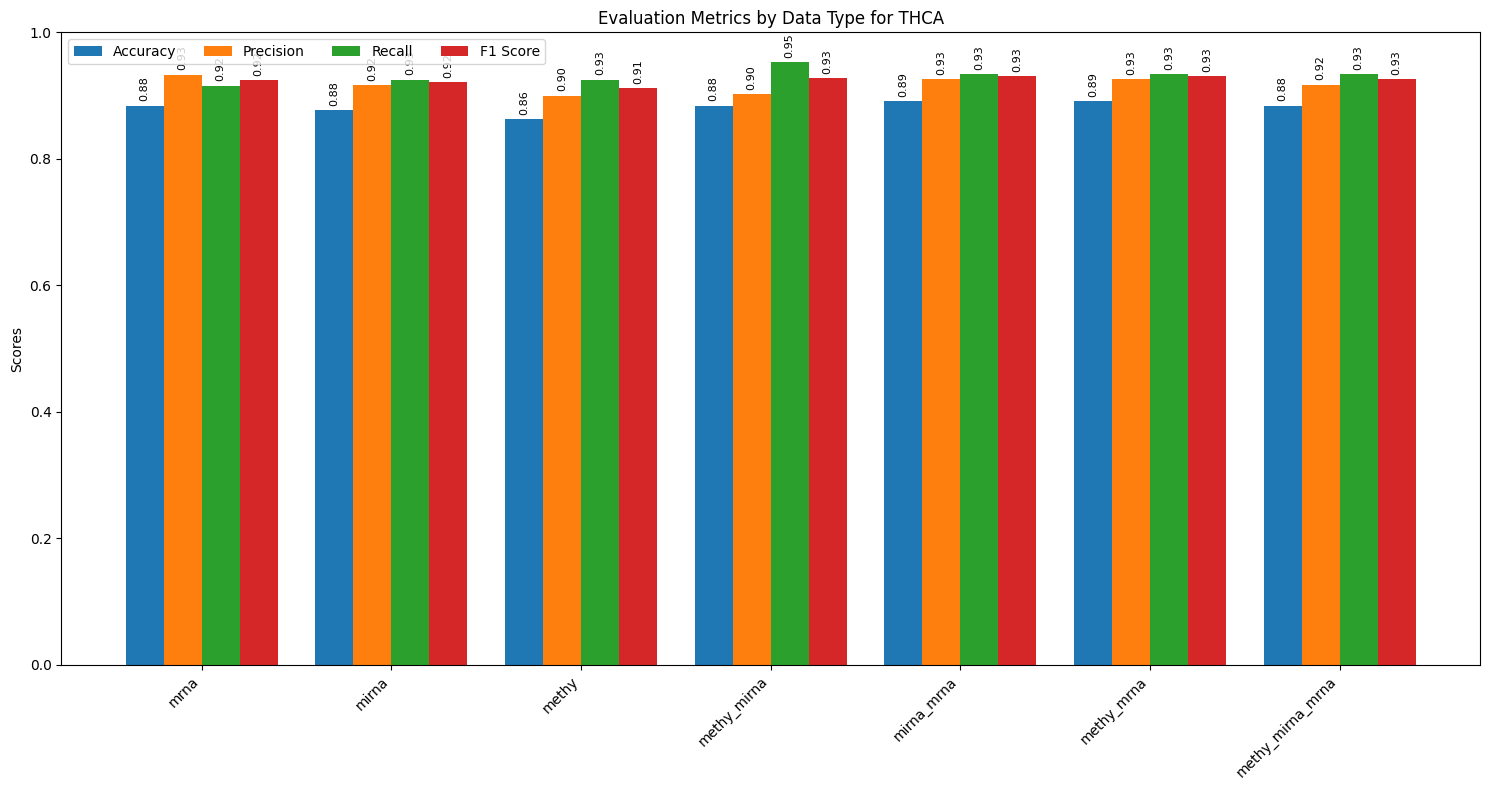

Bar graph has been saved as 'evaluation_metrics_comparison.png' in the evaluation_matrix folder.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os

def read_evaluation_results(file_path):
    results = {}
    current_data_type = None
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('Processing:'):
                current_data_type = line.split(':')[1].strip()
                results[current_data_type] = {}
            elif ':' in line:
                metric, value = line.split(':')
                metric = metric.strip()
                if metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
                    results[current_data_type][metric] = float(value)
    return results

# Path to the evaluation results file
eval_folder = "evaluation_matrix"
results_file = os.path.join(eval_folder, "evaluation_results_UCEC.txt")

# Read the results
results = read_evaluation_results(results_file)

# Prepare data for plotting
data_types = list(results.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(data_types))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 8))

for metric in metrics:
    offset = width * multiplier
    rects = ax.bar(x + offset, [results[dt][metric] for dt in data_types], width, label=metric)
    ax.bar_label(rects, fmt='{:.2f}', padding=3, rotation=90, fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Data Type for UCEC')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(data_types, rotation=45, ha='right')
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig(os.path.join(eval_folder, 'evaluation_metrics_UCEC.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Bar graph has been saved as 'evaluation_metrics_comparison.png' in the {eval_folder} folder.")
            